[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_02/blob/master/M02_A-DJ-Data_Preparation_Assignment_Master.ipynb)

# Data Preparation

Below are examples of the Titanic dataset, containing passenger records on board the titanic, and the OKCupid dataset, containing records authorized by OKCupid for use in Machine Learning research.

Your assignment is to combine the results of the Titanic and OKCupid datasets. You should replace each passenger aboard the titanic and their relevant data with a matching individual from the OKCupid dataset.

There should be no duplicates in the remaining dataset, with no NaNs, nulls, or missing information. More specifics at the bottom.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

# The first few records
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [0]:
# 891 passengers with 15 data entries per
print(titanic.shape)

(891, 15)


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


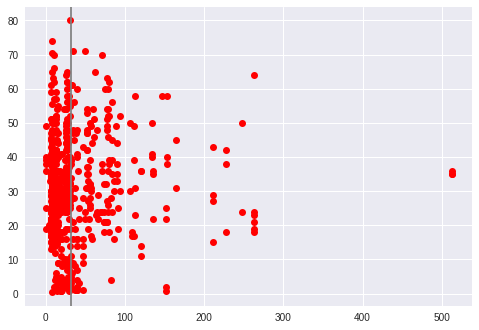

In [0]:
# describe produces interesting statistics about a pandas DataFrame or Series
print(titanic.describe(include=[np.number]))

import matplotlib.pyplot as plt
plt.plot(titanic['fare'],titanic['age'],'or')
plt.axvline(titanic['fare'].mean(),color="grey")

### OKCupid

The OKCupid dataset is 150MB and needs to be downloaded to your Colab session before you can load it. It loads using the same command as the titanic.

In [0]:
!wget https://www.dropbox.com/s/kurta6eazegc3su/JSE_OkCupid_profiles.csv?raw=1 -O /tmp/JSE_OkCupid_profiles.csv

--2018-04-09 01:14:42--  https://www.dropbox.com/s/kurta6eazegc3su/JSE_OkCupid_profiles.csv?raw=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/HgdlFakFGx3gsvGhbySNfncCzJor19sn8SgzMRHGS105jXY9lYgHwW08HDauNe1l/file [following]
--2018-04-09 01:14:43--  https://dl.dropboxusercontent.com/content_link/HgdlFakFGx3gsvGhbySNfncCzJor19sn8SgzMRHGS105jXY9lYgHwW08HDauNe1l/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.1.6, 2620:100:6016:6::a27d:106
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.1.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151614805 (145M) [text/csv]
Saving to: ‘/tmp/JSE_OkCupid_profiles.csv’

/tmp/JSE_OkCupid_pr 100%[===================>] 144.59M  43.3MB/s    in 5.2

In [0]:
okcupid = pd.read_csv('/tmp/JSE_OkCupid_profiles.csv')

# almost 60000 individuals with 31 columns each
print(okcupid.shape)

# There are many more columns in OKCupid than titanic
print(okcupid.columns)

# The set of body_types 
print(okcupid.body_type.unique())

(59946, 31)
Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']


In [0]:
# The number of unique entries for each column
for column in okcupid.columns:
  print(column, okcupid[column].unique().size)

age 54
body_type 13
diet 19
drinks 7
drugs 4
education 33
essay0 54351
essay1 51517
essay2 48636
essay3 43534
essay4 49261
essay5 48964
essay6 43604
essay7 45555
essay8 39325
essay9 45444
ethnicity 218
height 61
income 13
job 22
last_online 30123
location 199
offspring 16
orientation 3
pets 16
religion 46
sex 2
sign 49
smokes 6
speaks 7648
status 5


In [0]:
print(okcupid[1:10].isnull())

     age  body_type   diet  drinks  drugs  education  essay0  essay1  essay2  \
1  False      False  False   False  False      False   False   False   False   
2  False      False  False   False   True      False   False   False   False   
3  False      False  False   False   True      False   False   False   False   
4  False      False   True   False  False      False   False   False   False   
5  False      False  False   False   True      False   False   False   False   
6  False      False  False   False  False      False   False   False   False   
7  False      False  False   False  False      False    True   False   False   
8  False       True  False   False   True      False    True   False    True   
9  False      False  False   False  False      False   False   False   False   

   essay3   ...    location  offspring  orientation   pets  religion    sex  \
1    True   ...       False      False        False  False     False  False   
2   False   ...       False       True   

### Duplicates

There are no duplicates in OKCupid and 107 titanic duplicates.

In [0]:
print(okcupid.duplicated().sum())
print(titanic.duplicated().sum())

0
107


## Instructions

Titanic contains 891 records with 107 duplicates. The final table should contain 784 records. The titanic dataset is also full of  redudant columns: `survived : alive`, `sex : who : adult_male`, which can be identified if they are truly redundant and can be removed if so.

The OKCupid dataset has ~60k records. There are 31 columns that match many of the features (importantly age/sex) in the titanic set.

Update each row of the titanic dataset to contain OKCupid data that matches in demographic information. Select a few columns from the OKCUpid dataset to transfer to the titanic dataset as well to increase the personality of each entry. Do not move the extremely long written records in the OKCupid dataset as part of this process. Those records will be useful later for NLP and text mining.

_Document and justify your decisions!_

### Benchmark

The titanic dataset is very popular for beginning Data Science training.

Your final dataset should perfectly match these two obvious and famous benchmarks of the titanic data, with other new, interesting analysis available from your combinations:

In [0]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [0]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Suggested search terms

python pandas replace columns

python pandas concatenate columns

python pandas concatenate rows

python pandas remove duplicates

python pandas merge and join records


# Stretch goal

Analyze the data in your new titanic dataset using the visualization tutorials found here:


[Seaborn plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)